NAICS Time Series Analysis

This notebook includes step by step procedure for data preparation for an analysis. 

The first step is to import necessary libraries.

In [1]:
#import necessary libaries
import pandas as pd
import re
import matplotlib.pyplot as plt

After importing the libraries, we need to read the csv files and change to pandas dataframes. After that we need to combine the data frames according to NAICS code  ( 2 Digit, 3 Digit and 4 Digit). This is a function to read csv files and combine them into 2/3/4Digit NAICS files.

In [2]:
#function for reading csv file
def read_file(df,list_fi):
  for file in list_fi:
    dff=pd.read_csv(file)
    df=df.append(dff,ignore_index=True)
  return df
  

Files to be read and combine according 2/3/4 Digit of NAICS.

In [3]:
NAICS2=['/content/RTRA_Employ_2NAICS_97_99.csv','/content/RTRA_Employ_2NAICS_00_05.csv','/content/RTRA_Employ_2NAICS_06_10.csv','/content/RTRA_Employ_2NAICS_11_15.csv','/content/RTRA_Employ_2NAICS_16_20.csv']

In [4]:
NAICS3=['/content/RTRA_Employ_3NAICS_97_99.csv','/content/RTRA_Employ_3NAICS_00_05.csv','/content/RTRA_Employ_3NAICS_06_10.csv','/content/RTRA_Employ_3NAICS_11_15.csv','/content/RTRA_Employ_3NAICS_16_20.csv']

In [5]:
NAICS4=['/content/RTRA_Employ_4NAICS_97_99.csv','/content/RTRA_Employ_4NAICS_00_05.csv','/content/RTRA_Employ_4NAICS_06_10.csv','/content/RTRA_Employ_4NAICS_11_15.csv','/content/RTRA_Employ_4NAICS_16_20.csv']

In [6]:
NAICS2_,NAICS3_,NAICS4_=pd.DataFrame(),pd.DataFrame(),pd.DataFrame()

In [7]:
NAICS2_D=read_file(NAICS2_,NAICS2)

In [8]:
NAICS2_D.shape

(5472, 4)

In [9]:
NAICS2_D.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,1997,1,Accommodation and food services [72],129250
1,1997,1,"Administrative and support, waste management a...",58500
2,1997,1,"Agriculture, forestry, fishing and hunting [11]",62250
3,1997,1,"Arts, entertainment and recreation [71]",38750
4,1997,1,Construction [23],118000


In [10]:
NAICS2_D.tail()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
5467,2019,12,"Real estate, rental and leasing [53]",0
5468,2019,12,Retail trade [44-45],0
5469,2019,12,Transportation and warehousing [48-49],0
5470,2019,12,Utilities [22],0
5471,2019,12,Wholesale trade [41],0


In [11]:
NAICS3_D=read_file(NAICS3_,NAICS3)

In [12]:
NAICS3_D.shape

(28140, 4)

In [13]:
NAICS4_D=read_file(NAICS4_,NAICS4)

In [14]:
NAICS4_D.shape

(85572, 4)

To map with the provide LMO file, we need to use NAICS code. So the following function remove the industry names and left only the code numbers.

In [15]:
#function to make 2 digit and 3 digit df to remove NAICS names and only left the code number
def remove_NAICSnames(df_name):
  for i in range(len(df_name)):
    str1=df_name.NAICS.loc[i]
    fil=re.search(r'((\d+)(-)(\d+))|(\d+)',str1)
    if fil:
      df_name.loc[i,'NAICS']=fil.group(0)
    else:
      df_name.loc[i,'NAICS']=''
  

In [16]:
#removing Industry Names by calling the above function
remove_NAICSnames(NAICS2_D)

In [17]:
NAICS2_D.shape

(5472, 4)

In [18]:
NAICS2_D.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,1997,1,72,129250
1,1997,1,56,58500
2,1997,1,11,62250
3,1997,1,71,38750
4,1997,1,23,118000


In [19]:
NAICS2_D.tail()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
5467,2019,12,53,0
5468,2019,12,44-45,0
5469,2019,12,48-49,0
5470,2019,12,22,0
5471,2019,12,41,0


In NAICS, some of them refers to more than one code number. Eg. 44-45 and 48-49. So I split them into separate rows.

In [20]:
#split rows like(44-45) into two
NAICS2_D.NAICS=NAICS2_D.NAICS.str.split('-')

In [21]:
NAICS2_D.tail(10)

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
5462,2019,12,"[31, 33]",0
5463,2019,12,[21],0
5464,2019,12,[81],0
5465,2019,12,[54],0
5466,2019,12,[91],0
5467,2019,12,[53],0
5468,2019,12,"[44, 45]",0
5469,2019,12,"[48, 49]",0
5470,2019,12,[22],0
5471,2019,12,[41],0


In [22]:
#explode
NAICS2_D=NAICS2_D.apply(pd.Series.explode)

In [23]:
NAICS2_D.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,1997,1,72,129250
1,1997,1,56,58500
2,1997,1,11,62250
3,1997,1,71,38750
4,1997,1,23,118000


In [105]:
NAICS2_D.tail()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
5468,2019,12,45,0
5469,2019,12,48,0
5469,2019,12,49,0
5470,2019,12,22,0
5471,2019,12,41,0


In [24]:
NAICS3_D.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,1997,1,Aboriginal public administration[914],500
1,1997,1,Accommodation services[721],24000
2,1997,1,Administrative and support services[561],56750
3,1997,1,Air transportation[481],17000
4,1997,1,Ambulatory health care services[621],40000


Do the same for 3Digit data.

In [25]:
remove_NAICSnames(NAICS3_D)

In [26]:
NAICS3_D.shape

(28140, 4)

In [27]:
NAICS3_D.head(10)

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,1997,1,914,500
1,1997,1,721,24000
2,1997,1,561,56750
3,1997,1,481,17000
4,1997,1,621,40000
5,1997,1,713,20000
6,1997,1,112,13500
7,1997,1,312,2500
8,1997,1,515,4750
9,1997,1,444,16000


In [28]:
NAICS3_D.tail(10)

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
28130,2019,12,313,0
28131,2019,12,314,0
28132,2019,12,485,0
28133,2019,12,336,0
28134,2019,12,484,0
28135,2019,12,221,0
28136,2019,12,493,0
28137,2019,12,562,0
28138,2019,12,483,0
28139,2019,12,321,0


In [29]:
NAICS4_D.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,1997,1,1100,3500
1,1997,1,1111,250
2,1997,1,1112,500
3,1997,1,1113,2250
4,1997,1,1114,5250


In [30]:
NAICS4_D.tail()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
85567,2019,12,9111,0
85568,2019,12,9120,0
85569,2019,12,9130,0
85570,2019,12,9141,0
85571,2019,12,9191,0


4Digit Data does not need to remove names. It originally has only NAICS code. 
Then, import a mapping file for combining data for the most frequently used 59 industries.

In [31]:
# import LMO data
lmo=pd.read_excel('/content/LMO_Detailed_Industries_by_NAICS.xlsx')

In [32]:
lmo.shape

(59, 2)

In [33]:
lmo.head()

,LMO_Detailed_Industry,NAICS
0,Farms,111 & 112
1,"Fishing, hunting and trapping",114
2,Forestry and logging,113
3,Support activities for agriculture and forestry,115
4,Oil and gas extraction,211


Need some processing. Replace & with ',' first. 

In [34]:
# replace & with ,
lmo.NAICS=lmo.NAICS.replace(to_replace=' & ',value=',',regex=True)

In [35]:
lmo.head()

,LMO_Detailed_Industry,NAICS
0,Farms,"111,112"
1,"Fishing, hunting and trapping",114
2,Forestry and logging,113
3,Support activities for agriculture and forestry,115
4,Oil and gas extraction,211


In [36]:
lmo.tail()

,LMO_Detailed_Industry,NAICS
54,Food services and drinking places,722
55,"Repair, personal and non-profit services",81
56,Federal government public administration,911
57,Provincial and territorial public administration,912
58,Local and Indigenous public administration,"913, 914,919"


Then, More than one NAICS like (111,112) are splitted into multiple rows which refers to the same industry.

In [37]:
# split the row which has more than one NAICS code to multiple rows
lmo.NAICS=lmo.NAICS.astype('str').str.split(',')

In [38]:
lmo.head()

,LMO_Detailed_Industry,NAICS
0,Farms,"[111, 112]"
1,"Fishing, hunting and trapping",[114]
2,Forestry and logging,[113]
3,Support activities for agriculture and forestry,[115]
4,Oil and gas extraction,[211]


In [39]:
#explode
lmo=lmo.apply(pd.Series.explode)

In [40]:
lmo.head()

,LMO_Detailed_Industry,NAICS
0,Farms,111
0,Farms,112
1,"Fishing, hunting and trapping",114
2,Forestry and logging,113
3,Support activities for agriculture and forestry,115


In [41]:
lmo.NAICS.unique()

array(['111', '112', '114', '113', '115', '211', '213', '212', '22', '23',
       '311', '312', '321', '322', '331', '332', '333', '3366', '3361',
       '  3362', '  3363', ' 3364', ' 3365', ' 3369', '313', ' 314',
       ' 315', ' 316', ' 323', ' 324', ' 325', ' 326', ' 327', ' 334',
       ' 335', ' 337', '339', '41', '441', '446', '442', '443', '444',
       '445', '447', '448', '451', '452', '453', '454', '481', '482',
       '483', '484', '488', '491', '492', '485', '486', '487', '493',
       '524', '521', ' 522', ' 523', '526', '53', '5413', '5415', '5416',
       '5411', ' 5412', ' 5414', ' 5417', ' 5418', '5419', '55', '56',
       '6111', '6112', '6113', '6114', ' 6115', ' 6116', '6117', '621',
       '622', '623', '624', '511', '512', '517', '515', ' 518', '519',
       '711', '713', '712', '721', '722', '81', '911', '912', '913',
       ' 914', '919'], dtype=object)

Since NAICS code is string type so need to remove spaces for exact matching while combining. We can also convert into integer type. However, here I just use as a string.

In [42]:
# remove white spaces on NAICS
lmo.NAICS=lmo.NAICS.str.strip()

The following function is for merging data frames. To get the same output as the Output Data Format, the merged data frame is sort according to Year and Month.

In [43]:
#function for mergine data frame
def merge_df(df1,df2):
  df_new=df1.merge(df2,on='NAICS').sort_values(['SYEAR','SMTH','LMO_Detailed_Industry']).reset_index(drop=True)
  return df_new

In [44]:
NAICS2_merged=merge_df(NAICS2_D,lmo)

In [45]:
NAICS2_merged.shape

(1884, 5)

In [46]:
NAICS2_merged.NAICS.value_counts()

23    276
41    276
22    276
81    276
56    276
53    276
55    228
Name: NAICS, dtype: int64

In [47]:
NAICS2_merged.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_,LMO_Detailed_Industry
0,1997,1,56,58500,"Business, building and other support services"
1,1997,1,55,1750,"Business, building and other support services"
2,1997,1,23,118000,Construction
3,1997,1,53,50750,Real estate rental and leasing
4,1997,1,81,89250,"Repair, personal and non-profit services"


In [48]:
#checking null values
NAICS2_merged.isnull().sum()

SYEAR                    0
SMTH                     0
NAICS                    0
_EMPLOYMENT_             0
LMO_Detailed_Industry    0
dtype: int64

In [49]:
#combine two rows which has same Industry name and sum employment
NAICS2_merged=NAICS2_merged.groupby(by=['SYEAR','SMTH','LMO_Detailed_Industry']).agg({'_EMPLOYMENT_':sum}).reset_index()

In [50]:
NAICS2_merged.head()

,SYEAR,SMTH,LMO_Detailed_Industry,_EMPLOYMENT_
0,1997,1,"Business, building and other support services",60250
1,1997,1,Construction,118000
2,1997,1,Real estate rental and leasing,50750
3,1997,1,"Repair, personal and non-profit services",89250
4,1997,1,Utilities,9750


In [51]:
type(NAICS2_merged)

pandas.core.frame.DataFrame

In [52]:
NAICS2_merged.shape

(1656, 4)

In [53]:
NAICS3_merged=merge_df(NAICS3_D,lmo)

In [54]:
NAICS3_merged.shape

(20736, 5)

In [55]:
NAICS3_merged.NAICS.value_counts()

446    552
332    276
444    276
337    276
452    276
      ... 
517    276
339    276
722    276
316    276
521     36
Name: NAICS, Length: 75, dtype: int64

In [56]:
NAICS3_merged.head(10)

,SYEAR,SMTH,NAICS,_EMPLOYMENT_,LMO_Detailed_Industry
0,1997,1,721,24000,Accommodation services
1,1997,1,481,17000,Air transportation
2,1997,1,621,40000,Ambulatory health care services
3,1997,1,713,20000,"Amusement, gambling and recreation industries"
4,1997,1,515,4750,"Broadcasting, data processing, and information"
5,1997,1,518,2000,"Broadcasting, data processing, and information"
6,1997,1,519,3000,"Broadcasting, data processing, and information"
7,1997,1,332,11750,Fabricated metal product manufacturing
8,1997,1,112,13500,Farms
9,1997,1,111,8750,Farms


In [57]:
NAICS3_merged.tail(10)

,SYEAR,SMTH,NAICS,_EMPLOYMENT_,LMO_Detailed_Industry
20726,2019,12,213,0,Support activities for mining and oil and gas ...
20727,2019,12,488,0,Support activities for transportation
20728,2019,12,517,0,Telecommunications
20729,2019,12,486,0,"Transit, sightseeing, and pipeline transportation"
20730,2019,12,487,0,"Transit, sightseeing, and pipeline transportation"
20731,2019,12,485,0,"Transit, sightseeing, and pipeline transportation"
20732,2019,12,484,0,Truck transportation
20733,2019,12,493,0,Warehousing and storage
20734,2019,12,483,0,Water transportation
20735,2019,12,321,0,Wood product manufacturing


In [58]:
#combine two rows which has same Industry name and sum employment
NAICS3_merged=NAICS3_merged.groupby(by=['SYEAR','SMTH','LMO_Detailed_Industry']).agg({'_EMPLOYMENT_':sum}).reset_index()

In [59]:
NAICS3_merged.shape

(11868, 4)

In [60]:
NAICS3_merged.head(10)

,SYEAR,SMTH,LMO_Detailed_Industry,_EMPLOYMENT_
0,1997,1,Accommodation services,24000
1,1997,1,Air transportation,17000
2,1997,1,Ambulatory health care services,40000
3,1997,1,"Amusement, gambling and recreation industries",20000
4,1997,1,"Broadcasting, data processing, and information",9750
5,1997,1,Fabricated metal product manufacturing,11750
6,1997,1,Farms,22250
7,1997,1,Federal government public administration,34750
8,1997,1,Finance,44000
9,1997,1,"Fishing, hunting and trapping",4750


In [61]:
#checking null values
NAICS3_merged.isnull().sum()

SYEAR                    0
SMTH                     0
LMO_Detailed_Industry    0
_EMPLOYMENT_             0
dtype: int64

In [62]:
NAICS4_D.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,1997,1,1100,3500
1,1997,1,1111,250
2,1997,1,1112,500
3,1997,1,1113,2250
4,1997,1,1114,5250


In [63]:
type(NAICS4_D.NAICS.loc[0])

numpy.int64

In [64]:
NAICS4_D.NAICS=NAICS4_D.NAICS.astype('str')

In [65]:
type(NAICS4_D.NAICS.loc[0])

str

In [66]:
NAICS4_merged=merge_df(NAICS4_D,lmo)

In [67]:
NAICS4_merged.shape

(6348, 5)

In [68]:
NAICS4_merged.head(10)

,SYEAR,SMTH,NAICS,_EMPLOYMENT_,LMO_Detailed_Industry
0,1997,1,5413,27000,"Architectural, engineering and related services"
1,1997,1,6112,9000,Community colleges
2,1997,1,5415,18250,Computer systems design and related services
3,1997,1,6111,78250,Elementary and secondary schools
4,1997,1,5411,18750,"Legal, accounting, design, research, and adver..."
5,1997,1,5412,11000,"Legal, accounting, design, research, and adver..."
6,1997,1,5414,6250,"Legal, accounting, design, research, and adver..."
7,1997,1,5417,2750,"Legal, accounting, design, research, and adver..."
8,1997,1,5418,6500,"Legal, accounting, design, research, and adver..."
9,1997,1,5419,2750,"Legal, accounting, design, research, and adver..."


In [69]:
#combine two rows which has same Industry name and sum employment
NAICS4_merged=NAICS4_merged.groupby(by=['SYEAR','SMTH','LMO_Detailed_Industry']).agg({'_EMPLOYMENT_':sum}).reset_index()

In [70]:
NAICS4_merged.shape

(2760, 4)

In [71]:
NAICS4_merged.isnull().sum()

SYEAR                    0
SMTH                     0
LMO_Detailed_Industry    0
_EMPLOYMENT_             0
dtype: int64

In [72]:
NAICS2_merged.shape[0]+NAICS3_merged.shape[0]+NAICS4_merged.shape[0]

16284

Since we have to prepare data only for the range of 1997 to 2018, we need to extract new data frame from the merged data frame.

In [73]:
NAICS2_97_2018=NAICS2_merged[NAICS2_merged['SYEAR']<2019]

In [74]:
NAICS2_97_2018.shape

(1584, 4)

In [75]:
NAICS2_97_2018.tail()

,SYEAR,SMTH,LMO_Detailed_Industry,_EMPLOYMENT_
1579,2018,12,Construction,241750
1580,2018,12,Real estate rental and leasing,51750
1581,2018,12,"Repair, personal and non-profit services",120500
1582,2018,12,Utilities,12250
1583,2018,12,Wholesale trade,91500


In [76]:
NAICS3_97_2018=NAICS3_merged[NAICS3_merged['SYEAR']<2019]

In [77]:
NAICS3_97_2018.shape

(11352, 4)

In [78]:
NAICS4_97_2018=NAICS4_merged[NAICS4_merged['SYEAR']<2019]

In [79]:
NAICS4_97_2018.shape

(2640, 4)

In [80]:
1584+11352+2640

15576

After merging 2/3/4 Digit files respectively, they are concatenated to get the output data.

In [81]:
NAICS_Complete=pd.concat([NAICS2_97_2018,NAICS3_97_2018,NAICS4_97_2018],ignore_index=True)

In [82]:
NAICS_Complete.shape

(15576, 4)

In [83]:
output_template=pd.read_excel('/content/Data_Output_Template.xlsx')

In [84]:
output_template.shape

(15576, 4)

In [85]:
NAICS_Complete.to_csv('/content/NAICS_Output.csv')

In [86]:
# Analyzing
NAICS_Complete._EMPLOYMENT_.describe()

count     15576.000000
mean      36398.995249
std       42572.638827
min         250.000000
25%       10500.000000
50%       22750.000000
75%       42500.000000
max      270250.000000
Name: _EMPLOYMENT_, dtype: float64

In [87]:
NAICS_Complete.loc[NAICS_Complete._EMPLOYMENT_==250].values

array([[1998, 2, 'Heritage institutions', 250],
       [1998, 3, 'Heritage institutions', 250],
       [2000, 6, 'Oil and gas extraction', 250],
       [2011, 11, 'Fishing, hunting and trapping', 250],
       [2012, 1, 'Fishing, hunting and trapping', 250],
       [2012, 2, 'Fishing, hunting and trapping', 250],
       [2012, 3, 'Fishing, hunting and trapping', 250],
       [2017, 11, 'Fishing, hunting and trapping', 250]], dtype=object)

In [88]:
NAICS_Complete.head()

,SYEAR,SMTH,LMO_Detailed_Industry,_EMPLOYMENT_
0,1997,1,"Business, building and other support services",60250
1,1997,1,Construction,118000
2,1997,1,Real estate rental and leasing,50750
3,1997,1,"Repair, personal and non-profit services",89250
4,1997,1,Utilities,9750


The first step of analysis is checking 59 industries employment rate over year. Use Pandas groupby to get the employment amount for each industry.

In [89]:
industries=NAICS_Complete.groupby('LMO_Detailed_Industry')['_EMPLOYMENT_'].sum()

In [90]:
industries.head()

LMO_Detailed_Industry
Accommodation services                              9669500
Air transportation                                  3745250
Ambulatory health care services                    17292750
Amusement, gambling and recreation industries       8717750
Architectural, engineering and related services     8925250
Name: _EMPLOYMENT_, dtype: int64

In [91]:
industries.sort_values()

LMO_Detailed_Industry
Fishing, hunting and trapping                                        741250
Oil and gas extraction                                               808750
Heritage institutions                                                827000
Ship and boat building                                              1048750
Water transportation                                                1610500
Primary metal manufacturing                                         1665750
Rail transportation                                                 1670500
Warehousing and storage                                             1729750
Support activities for mining and oil and gas extraction            1732000
Transportation equipment manufacturing (excluding shipbuilding)     1742000
Machinery manufacturing                                             2251750
Broadcasting, data processing, and information                      2372750
Support activities for agriculture and forestry                   

In [92]:
#save as an excel file
industries.to_excel('/content/employment_per_industry.xlsx')

Firstly,I applied some Visualization of the extracted data on Tableau Dashboard to answer the following questions.
1. Which industry has the highest employment?
2. What are some top industries which has high employment?
3. Which industry has the lowest employment?
4. How is the evolution of employent for 59 industries?


From there, Other retail trade (excluding car and personal care) has the highest employment and consturction comes second. Some of the top industries which has high employment are: Food services and drinking places, Repair,personal and non-profit, Business, buildings and other support services and Hospitals industry. Fishing, trapping and hunting has the lowest employment. The variance of employment for a total of 59 industries has a upward trend means that the overall amount of employment is keep increasing. 
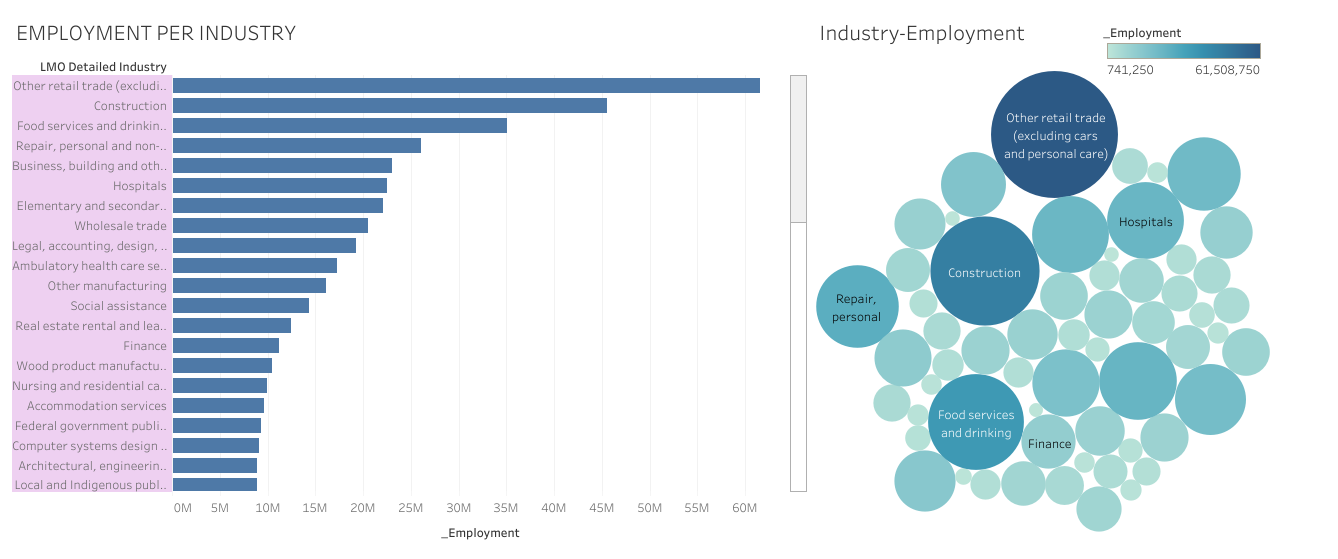
Dashboard link:https://public.tableau.com/views/NAICS_Time_Series_1/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

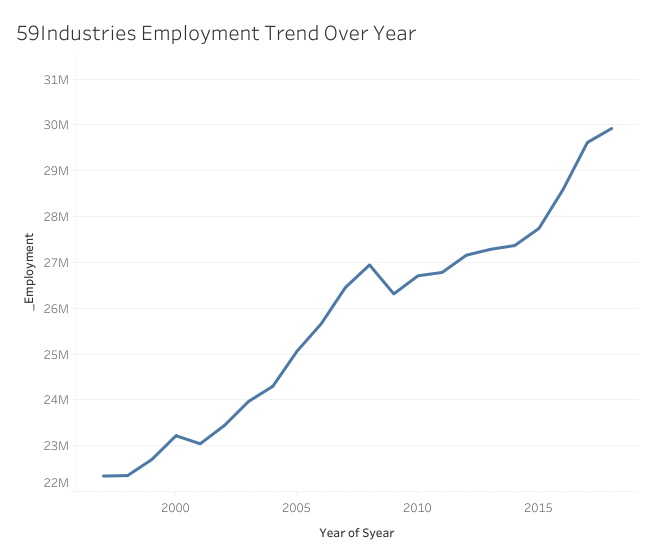
Dashboard link:https://public.tableau.com/views/NAICS_Time_Series/Dashboard3?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

The next focus question is how employment in Construction evolved over time and how this
compares to the total employment across all industries?
To answer this, first only data for construction is extracted.

In [93]:
construction_df=NAICS_Complete[NAICS_Complete.LMO_Detailed_Industry=='Construction']

In [94]:
construction_df.head()

,SYEAR,SMTH,LMO_Detailed_Industry,_EMPLOYMENT_
1,1997,1,Construction,118000
7,1997,2,Construction,120000
13,1997,3,Construction,116750
19,1997,4,Construction,125500
25,1997,5,Construction,123750


In [95]:
construction_df.tail()

,SYEAR,SMTH,LMO_Detailed_Industry,_EMPLOYMENT_
1555,2018,8,Construction,239500
1561,2018,9,Construction,238750
1567,2018,10,Construction,232750
1573,2018,11,Construction,242750
1579,2018,12,Construction,241750


In [96]:
construction_by_year=construction_df.groupby('SYEAR')['_EMPLOYMENT_'].sum().reset_index()

In [97]:
construction_by_year

,SYEAR,_EMPLOYMENT_
0,1997,1489750
1,1998,1424750
2,1999,1363500
3,2000,1345750
4,2001,1347250
5,2002,1401500
6,2003,1412000
7,2004,1705000
8,2005,1989000
9,2006,2097000


Line chart to see the trend of Construction Employment is plotted using matplotlib.

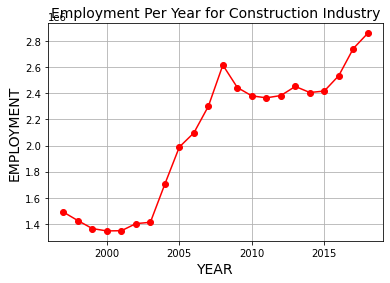

In [98]:
plt.plot(construction_by_year['SYEAR'],construction_by_year['_EMPLOYMENT_'],color='red',marker='o')
plt.title('Employment Per Year for Construction Industry', fontsize=14)
plt.xlabel('YEAR', fontsize=14)
plt.ylabel('EMPLOYMENT', fontsize=14)
plt.grid(True)
plt.show()

From the above line chart, we can see that the amount of employment was first  decreasing until 2001. Starting from 2003, the employment in construction was elvolved dramatically and reached the peak at 2008. After 2008, it was decreasing again until 2011 and gradually increasing. From 2015 to 2018, the employment in construction was going up with big steps. It is likely to keep going up after 2018 as well. 

In [99]:
NAICS_Complete.head()

,SYEAR,SMTH,LMO_Detailed_Industry,_EMPLOYMENT_
0,1997,1,"Business, building and other support services",60250
1,1997,1,Construction,118000
2,1997,1,Real estate rental and leasing,50750
3,1997,1,"Repair, personal and non-profit services",89250
4,1997,1,Utilities,9750


In [100]:
NAICS_Complete.to_excel('NAICS_Complete.xlsx')

To answer the second part of the above question, which is to compare construction with other industries. I created 59 subplots in Tableau Dashboard again. Interestingly, a trend line of construction is totally different from others while most of the other trends are similar in which the evolution of most industries did not change that much within these 22 years. Whereas, condustrion industry employment evolution had a huge change after 20th century. According to prediction analyis, there are some other industries which are likely to have upward trends for next 3 years in general. Among then, Motion Picuture and sound recording industries is the most distinct one which is the employment would keep increasing with big step during next three years. (2019-2021). Dashboard link: https://public.tableau.com/views/NAICS_Time_Series_2/Dashboard2?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link
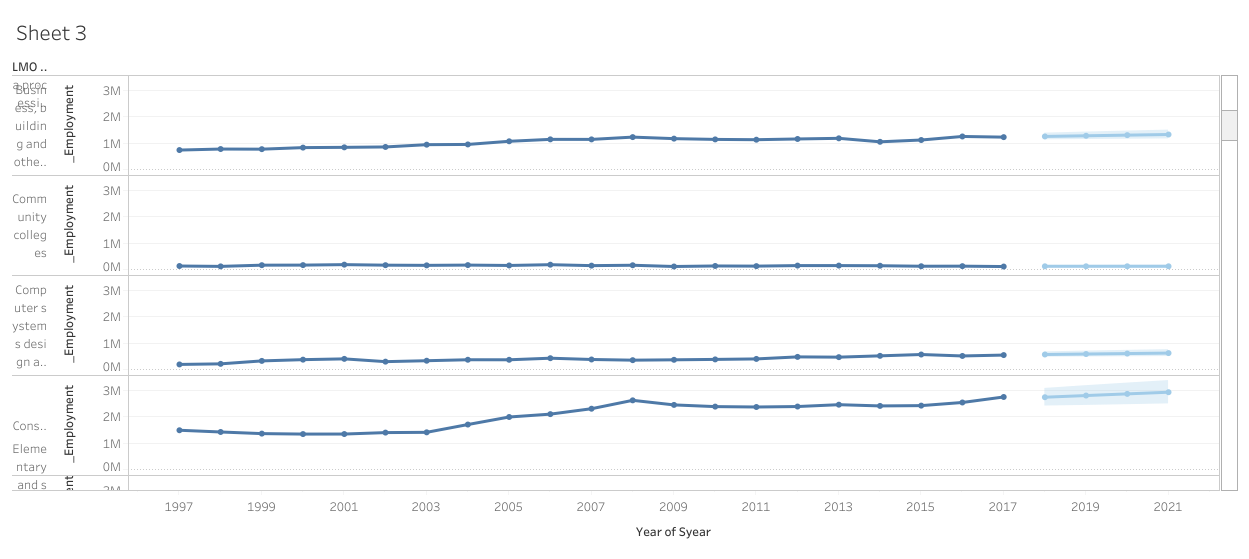

The next focus question is how Motion Picuture and Sound Recording Insdustry's employment has changed over time? To answer this, onldy data for motion picutre industry is extracted from the complete 59-industries data frame.

In [101]:
motionPicture_df=NAICS_Complete[NAICS_Complete.LMO_Detailed_Industry=='Motion picture and sound recording industries']

In [102]:
motionPicture_df.head()

,SYEAR,SMTH,LMO_Detailed_Industry,_EMPLOYMENT_
1604,1997,1,Motion picture and sound recording industries,6250
1647,1997,2,Motion picture and sound recording industries,4000
1690,1997,3,Motion picture and sound recording industries,7000
1733,1997,4,Motion picture and sound recording industries,7500
1776,1997,5,Motion picture and sound recording industries,7500


In [103]:
motionPicture_by_year=motionPicture_df.groupby('SYEAR')['_EMPLOYMENT_'].sum().reset_index()

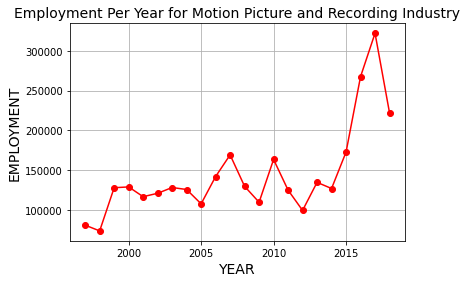

In [104]:
plt.plot(motionPicture_by_year['SYEAR'],motionPicture_by_year['_EMPLOYMENT_'],color='red',marker='o')
plt.title('Employment Per Year for Motion Picture and Recording Industry', fontsize=14)
plt.xlabel('YEAR', fontsize=14)
plt.ylabel('EMPLOYMENT', fontsize=14)
plt.grid(True)
plt.show()

We can see that the evolution of employment fluctuated with ups and downs before 2015. After 2015, the number of employment had increased suprisingly with large amount and reached the peak at 2017. It was falling down after 2017, and according to the prediction analysis, the employment evolution would again likely to goes up for next three years.
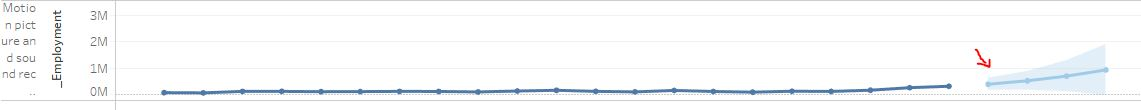

For my future work, I will continue on this analysis. I will try to get more insights from these data by asking more questions. I would apply some ML algorithms to peform the prediction and validation. I would also recheck my preparation steps and dashboard analysis. 



